# Landing a Rocket
In this assignment you are given a uniquely designed rocket ship, represented by a `Rocket` object, and tasked with landing the rocket on a platform floating in the sea. The different tasks lead you through a sequence of steps designed for you to get to know your rocket and to learn how to control it. 

To start please enter your student ID into the cell below.

In [1]:
# Do not alter any of the code within this cell other 
# than the value of studentID
import numpy as np
import matplotlib.pyplot as plt
# Setting global plotting settings
plt.rcParams['font.size'] = 20
plt.rcParams['axes.formatter.useoffset'] = False
from module_engine.assignment import Rocket

# Enter your student ID here
studentID = 1812600

# Your Rocket object to be used throughout this assignment
my_rocket = Rocket(studentID)  

Student ID found. Continue.



Your rocket has been generated from your student ID such that no two different IDs will ever create the same rocket. Want to see how yours looks like? Run the code in the next cell to have a look.

In [2]:
from IPython.display import HTML
html_code="<div style='display: block;text-align: center'>"+my_rocket.show()+"</div>"
HTML(html_code)

## Introduction
For your new assignment you have been drafted to help with the rocket development at Space-Z. The executives at Space-Z have been watching many rocket booster landings on Youtube recently and are now pushing for their engineering team to achieve vertical landings for their rockets. Your task will be to develop a first, simple feedback-control system for the horizontal thrusters to allow the rocket to land on a floating platform. However before you can do that, you will need to familiarise yourself with the provided rocket and calibrate the thrusters.

### Your rocket
You can interact with your rocket by calling methods of the 'my_rocket' object. 

Real-time interaction:
 - you can apply horizontal thrust by using the **advance** method: `.advance(left_thrust, right_thrust)` will apply `left_thrust` and `right_thrust` throughout an interval which is always $1 / 60$s long. The function returns a Numpy array with three values: the first two are the `x` and `y` positions of the rocket. If the third value is not 0, the rocket has left the simulated space and has to be reset, see below. 
The simulation does not continue outside of the `advance` method. Therefore, by calling the `advance` method repeatedly, you can perform, 'step-by-step', a flight or landing simulation.
  
Utility functions:
 - `.reset('space'/'drop')` returns your rocket to its starting position and initial conditions. The reset function can be called with the parameters `space` to perform tests without gravity, or `drop` to attempt landings on the floating platform.
 - `.get_platform_pos()` returns the current position of the floating platform 
 - `.get_flight_data()` can be called **after** a completed simulation, it returns the data recorded during the flight in the form of a two dimensional Numpy array, with each row being an array of three values: `[t, x, y]`. Here `x` and `y` refer to the rocket position at a time `t` after the start of the flight.

## Training space

 A first attempt at moving our rocket around. We are putting it into 'space' for testing by called `.reset('space')` to start. Then we use  `while` loops to call the `.advance` function repeatedly. Afterwards we request the flight data and plot the recorded rocket positions.

In [3]:
N = 0 # step counter
Nmax = 400 # maximum number of steps
thrust = 2000.0 # a random test thrust

my_rocket.reset('space')
# applying right thrust for a while
while N<Nmax:
    N+=1
    pos = my_rocket.advance(0.0,thrust)
# now left thrust
N=0
while N<2*Nmax:
    N+=1
    pos = my_rocket.advance(thrust,0.0)
# and right thrust again
N=0
while N<Nmax:
    N+=1
    pos = my_rocket.advance(0.0,thrust)
    
track = my_rocket.get_flight_data()

Now we can plot the x position of the rocket:

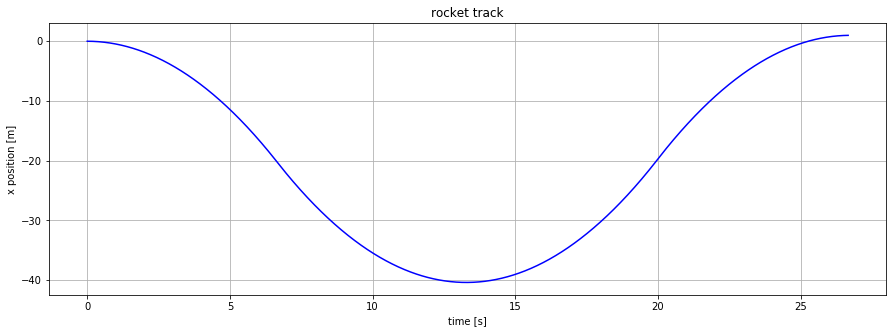

In [4]:
t=track[:,0]
x=track[:,1]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t,x, 'b-')
plt.title('rocket track') 
plt.xlabel('time [s]') 
plt.ylabel('x position [m]')
plt.grid()
plt.show()

From the position information we can compute the velocity and acceleration  as well:

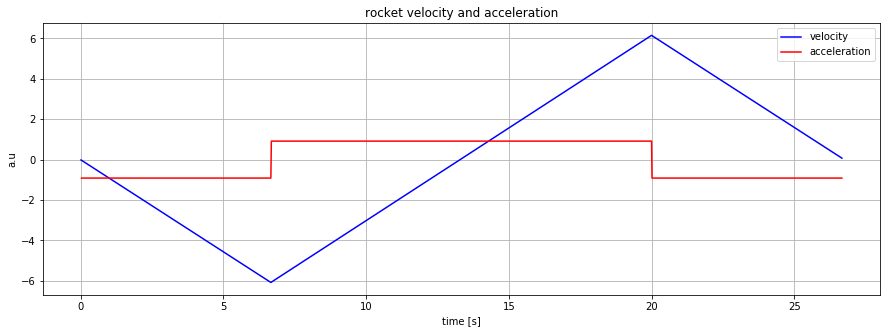

In [5]:
# Let's compute the speed and acceleration of our rocket
v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig = plt.figure(figsize=(15,5))
# Plot velocity and acceleration as a function of time
plt.plot(t[1:],v, 'b-', label='velocity')
plt.plot(t[2:],a, 'r-', label='acceleration')
plt.title('rocket velocity and acceleration') 
plt.xlabel('time [s]') 
plt.ylabel('a.u')
plt.grid()
plt.legend()
plt.show()

## Calibration
From the test above we can already see that we need to calibrate the rocket thrusters: we applied some numerical value to the input arguments `left_thrust` and `right_thrust` in `advance`, but the result shows a different numerical value for the resulting acceleration. This means that the actual thrust is not equal to the numerical values requested via the `advance` function. You can assume that the real acceleration of the rocket from the thrust requested from each thruster can be estimated by the equations:

$$a = \left\{\begin{align}(t-o)/m& \qquad \text{for}\ (t-o)>0\ \text{and}\  (t-o)<tmax\\tmax/m & \qquad \text{for}\ (t-o)>=tmax\\0 & \qquad \text{otherwise}\end{align}\right.$$

and:
 - $t$ the requested thrust
 - $m$ is the mass of the rocket 
 - $o$ is an offset between requested thrust and applied thrust
 - $tmax$ is a maximum level for achievable thrust

The parameter $o$ is different for each thruster and the numerical values unknown. Also, the rocket mass $m$ and the maximum for the requested thrust are unknown.

In this task you are asked to use the `space` mode with your rocket to calibrate your thrusters. You are supposed to do one or several experiments to find the parameters $o$ for each thruster, the mass $m$ and the maximum thrust $tmax$. This is another example for the process of `system identification`, however, this time we should not use the frequency domain but use the time domain data directly.

# Task 1: System Identification
#### Marks available:  8
Interact with your rocket in order to obtain the numerical values for $o$ (left and right), $tmax$ and $m$ with the following accuracy:
 - m, rocket mass, +- 1.0 kg
 - o_left, o_right, thrust offset, +- 1 N
 - tmax, maximum thrust, +- 10.0 N

In [6]:
# Student code to experiment with rocket
# First tests: calculate thrust offsets

right_thrust=[2000,5000,0,0]
left_thrust=[0,0,2000,5000]
a=[]
Nmax=400

for i in range(0,4):
    N=0
    my_rocket.reset('space')
    
    while N<Nmax:
        N+=1
        pos = my_rocket.advance(left_thrust[i], right_thrust[i])
        
    t=my_rocket.get_flight_data()[:,0]
    x=my_rocket.get_flight_data()[:,1]
    
    v = np.diff(x)/np.diff(t)
    a.append(np.diff(v)/np.diff(t)[1:])


offsetr=(a[1][396]*right_thrust[0]-a[0][396]*right_thrust[1])/(a[1][396]-a[0][396])

offsetl=(a[3][396]*left_thrust[2]-a[2][396]*left_thrust[3])/(a[3][396]-a[2][396])


In [7]:
# Second experiment: calculate mass
mass=abs((right_thrust[0]-offsetr)/a[0][40])

In [8]:
# Last experiment: get maximum thrust
N = 0
Nmax = 400
thrust = 1000000000000

my_rocket.reset('space')

while N<Nmax:
    N+=1
    pos = my_rocket.advance(thrust,0,0)
track = my_rocket.get_flight_data()
t=track[:,0]
x=track[:,1]
v = np.diff(x)/np.diff(t)
a_max = np.diff(v)/np.diff(t)[1:]

thrust_max=abs(a_max[396])*mass


In [9]:
# Enter the results from your experiments into these variables here
# (you may type the numerical value with the requested accuracy or you
# can assign these variables to another variable computed above):
o_left = offsetl
o_right = offsetr
m = mass
tmax = thrust_max


## Task 2: There and Stop
#### Marks available:  2

Knowing the thruster calibration, we can try to move the rocket around in a more precise fashion. In this task you must move a rocket from the starting point `x0` to a point `x1`. 

### Using the thruster calibration 
First write two utility functions that make use of the known thruster calibration to compute the required thrust for a given acceleration that we want to apply to the rocket. Each function should accept a Numpy array and return a Numpy array (both of float values).

In [10]:
# Add functions here (do not change the function names!)

def acc2thrust_left(acceleration):
    # your code here
    thrust = acceleration * m + o_left
    return thrust

def acc2thrust_right(acceleration):
    # your code here
    thrust = acceleration * m + o_right
    return thrust

You should test these functions by applying a known acceleration to the rocket and compare it to the measured acceleration. This test will not be marked, but it is your only means for testing if your functions work as required. You will lose marks in this and the following tasks if the functions are not implemented exactly as requested. Hint: after doing an experiment that uses your utility functions make a plot that shows the difference between the requested and the measured acceleration. For thrusts below the maximum value the absolute acceleration errors should be well below 1/1000.

In [11]:
# Test thruster utility functions

# Test thruster utility functions

### Moving the rocket with a pre-calculated control sequence
Now make use of your utility functions to move the
rocket exactly 100 meters to the right such that it stops there. Your starting point is x0, and the target point at which you should stop is x1=x0+100m. The task is to 
- end the flight with the rocket speed $v<0.1$m/s 
- at a position $x=x1\pm 1$m. 
- The total flight time must be less than 30s. 
- at no time the rocket position must be larger than x = x0 + 101m

You are not supposed to use any algorithm to determine your rocket thrust in real time, but to use a constant thrust (left or right) for pre-determined lengths of time. In other words, you hard-code a control sequence in advance of the flight. Note that you must fire the **left** thruster to move to the right. 

The marking script will evaluate your track data, recorded in the cell below the next. Make sure that the track data contains the full flight path. You should plot your track to check at least that you arrived at the correct final position in the allowed time. 

In [12]:
# Student code for 'there and stop'

N = 0 # step counter
my_rocket.reset('space')


while N<785:
    N+=1
    pos = my_rocket.advance(acc2thrust_left(0.8),0.0)


N=0
while N<360:
    N+=1
    pos = my_rocket.advance(0.0,acc2thrust_right(1.75))


In [13]:
# The following records the track data to be marked, Make sure
# that you do not call `reset()` during or after your flight!
student_track1 = my_rocket.get_flight_data() 

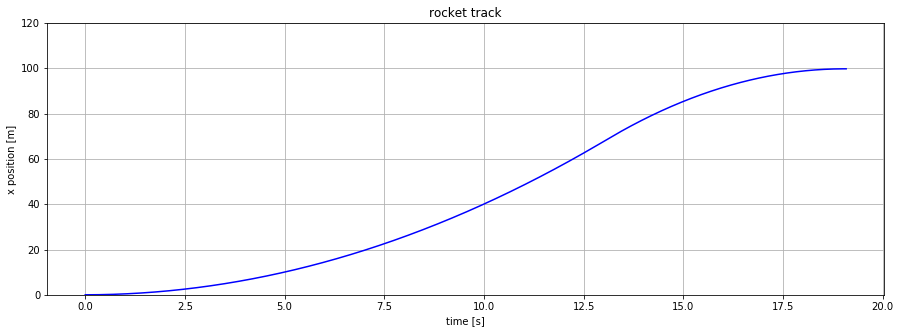

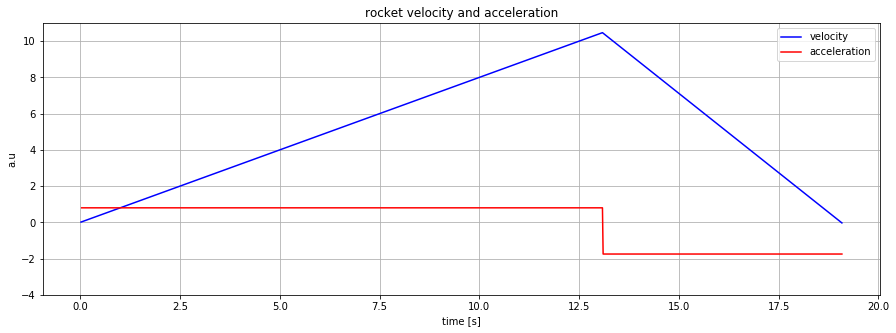

In [14]:
# Cell for plotting the track to check results

t=student_track1[:,0]
x=student_track1[:,1]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t,x, 'b-')
plt.title('rocket track') 
plt.xlabel('time [s]')
plt.ylim((0,120))
plt.ylabel('x position [m]')
plt.grid()
plt.show()

# Let's compute the speed and acceleration of our rocket
v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig = plt.figure(figsize=(15,5))
# Plot velocity and acceleration as a function of time
plt.plot(t[1:],v, 'b-', label='velocity')
plt.plot(t[2:],a, 'r-', label='acceleration')
plt.title('rocket velocity and acceleration') 
plt.xlabel('time [s]') 
plt.ylabel('a.u')
plt.ylim((-4,11))
plt.grid()
plt.legend()
plt.show()


## Task 3: Feedback Control
#### Marks available:  6

In the task above we could use our accurate knowledge of the total force acting on the rocket to determine the required thrust for the entire flight in advance. However, in the final task when we want to land the rocket, side winds and a moving target will make this approach impossible. Instead we must use a `feedback control system`.

Feedback control makes use of real-time information to change parameters. In our case we will use the horizontal position of the rocket to adjust the applied thrust. In this task you will develop a feedback algorithm for your rocket.

### Moving there, using feedback
Your task is again to move the rocket from a starting point $x0$ to a new target position $x=x0+100$ m and keep it there, but now using a feedback system.

The first naive approach is to fire the left thruster if the rocket is to the left of the target, and fire the right thruster when it is to the right of the target. We might be already a bit smarter and compute the thrust such that it is proportional to the distance of the rocket from the target. However, this will not work, instead the rocket will oscillate around the target position. Nevertheless, you will first implement such a not successful algorithm to verify this.

Write a function that accepts 2 input arguments: the x-position of the rocket and the target position, and returns two values: `left_thrust` and `right_thrust` to be used with `advance()` method. Your function should compute the thrust such that the rocket acceleration is proportional to the distance from the target, using a code similar to ` acc = gain * (target-pos)`. The `gain` is a numerical scaling that you can set to change the strength of the feedback. Your function should call the `acc2thrust_right` and `acc2thrust_left` functions defined above.

In [15]:
# Student code for position-based feedback,
# do *not* change the name or arguments of the function.

def position_feedback(pos, target):
          
    # Your code here
    gain = 0.5
    
    acc = gain * (target-pos)
    left_thrust = acc2thrust_left(acc)
    right_thrust = acc2thrust_right(-acc)
    
    return left_thrust, right_thrust


### Oscillate
Test your function by trying to move the rocket to a target position which is 100 m to the right of your starting position. Adjust the `gain` in your function such that you can clearly see the rocket oscillation around the target position during an approximately 60 s long flight. The track of your test is recorded in the cell below next. Your **track data stored in 'student_track2' will be analysed and marked**.

In [16]:
# Student code for creating flight path with 
# an oscillation around target

my_rocket.reset("space")

#Your code here
N=0
Nmax=3600
target=100

while N<Nmax:
    N+=1
    if (target-pos[0])<0:
        pos = my_rocket.advance(0, position_feedback(pos[0], target)[1])
    if (target-pos[0])>0:
        pos = my_rocket.advance(position_feedback(pos[0], target)[0], 0)


In [17]:
# The following records the track data to be marked, Make sure
# that you do not call `reset()` during or after your flight!
student_track2 = my_rocket.get_flight_data() 

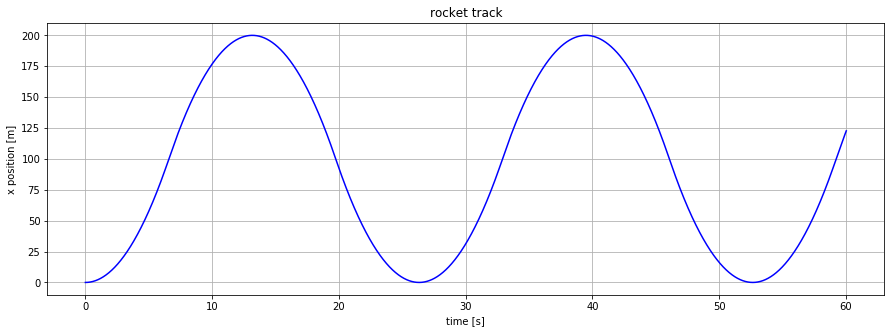

In [18]:
# Cell for plotting the track to check results

t=student_track2[:,0]
x=student_track2[:,1]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t,x, 'b-')
plt.title('rocket track') 
plt.xlabel('time [s]')
plt.ylabel('x position [m]')
plt.grid()
plt.show()


### Damped Oscillation 

The above result should not be surprising: we have created a system in which a restoring force is proportional to the position. Therefore we have created a harmonic oscillator that will oscillate forever around the target position. What we want to do instead is to create a damped oscillator that settles (quickly) at the target. We can achieve that by using a new function that computes the feedback based on the **position** and **speed** of the rocket.

Write a new feedback function to compute the rocket thrust. The function should accept three input arguments, position, velocity and target position. Internally it should use two gain values, a position gain `pos_gain` and a velocity gain `v_gain`, and return the thrust values as before. 

Adjust the two gains such that the rocket reaches its target quickly and does not overshoot the target by more than $1$m at any time. Perform a flight and record the track data in the cells below. The variable **'student_track3' will be used for marking your work**.

In [19]:
# Student code for position and velocity feedback,
# do *not* change the name or arguments of the function.

def damped_feedback(pos, v, target):
    
    # Your code here
    pos_gain = 1
    v_gain = 2.5
    acc = pos_gain*(target-pos) - v_gain*v
    
    if acc > 0:
        left_thrust = acc2thrust_left(acc)
        right_thrust = 0
        
    if acc < 0:
        right_thrust = acc2thrust_right(-acc)
        left_thrust = 0
        
    if acc == 0:
        left_thrust = 0
        right_thrust = 0
    return left_thrust, right_thrust

In [20]:
# Student code to create flight track with damped oscillation

N=0
Nmax=3600
target=100
v=0
my_rocket.reset("space")

while N<Nmax:
    N+=1
    pos_old = pos[0]
    pos = my_rocket.advance(damped_feedback(pos[0], v, target)[0], damped_feedback(pos[0], v, target)[1])
    v = (pos[0] - pos_old)*60

In [21]:
# The following records the track data to be marked, Make sure
# that you do not call `reset()` during or after your flight!
student_track3 = my_rocket.get_flight_data() 

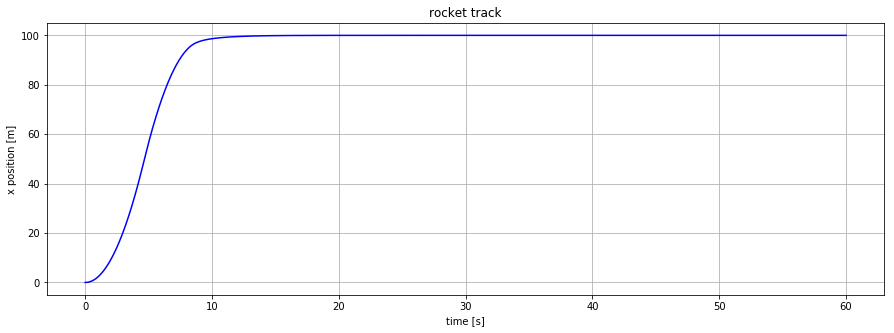

In [22]:
# Cell for plotting the track to check results
t=student_track3[:,0]
x=student_track3[:,1]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t,x, 'b-')
plt.title('rocket track') 
plt.xlabel('time [s]')
plt.ylabel('x position [m]')
plt.grid()
plt.show()

## Task 4: Landing the Rocket
#### Marks available:  4

We have finally arrived at the real challenge: your rocket starts at $2000$m above the sea level and your goal is to land it on a $20$m floating platform in the sea. Your rocket now operates in a 2D space with "x" the position along the sea surface, and "y" is the height of the rocket above the sea level.

The platform will change location between each run (upon calling `.reset('drop')`) and might also float sideways during your rocket's descent. You can get the coordinates of the platform's centre at any time using `my_rocket.get_platform_pos()`. These coordinates should be your target (a landing will be deemed successful if it is within $\pm 10$m of it). 

The rocket will be accelerated by gravity. In addition, it will be subject to atmospheric drag, which lessens the downwards acceleration a bit, but more importantly, any side wind will result in unpredictable horizontal forces. However you are already well equipped with the feedback control system from the previous task, which should handle wind and moving targets without any further adjustments.

In this task you must switch the rocket to landing mode by always using `reset('drop')`.

Write a loop to attempt 40 landings, the number of successful landings will be recorded automatically. Note that you might not be able to succeed in 100% of your attempts. You can achieve full marks by landing 70% of your rockets successfully.

At the start of the next cell you may call `my_rocket.reset_flight_counter()` to start counting flights from the 0 before looping over the 40 test landings. **Make sure that you use the variable 'tracks' to store all your flight paths (as prepared in the while-loop below), because this variable will be used for marking.**

In [23]:
# Student code to land rocket

my_rocket.reset_flight_counter()
Nflights=40
N=0
tracks=[]
# Your code here

while N<Nflights:
    my_rocket.reset('drop')
    # Your code here
    NN=0
    v=0
    Nmax=3600
    while NN<Nmax:
        NN+=1
        pos_old = pos[0]
        pos = my_rocket.advance(damped_feedback(pos[0], v, my_rocket.get_platform_pos()[0])[0], damped_feedback(pos[0], v, my_rocket.get_platform_pos()[0])[1])
        v = (pos[0] - pos_old)*60
    
    tracks.append(my_rocket.get_flight_data())
    N+=1


The rocket lands on the platform.
1 / 1 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
2 / 2 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
3 / 3 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
4 / 4 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
5 / 5 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
6 / 6 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
7 / 7 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on 

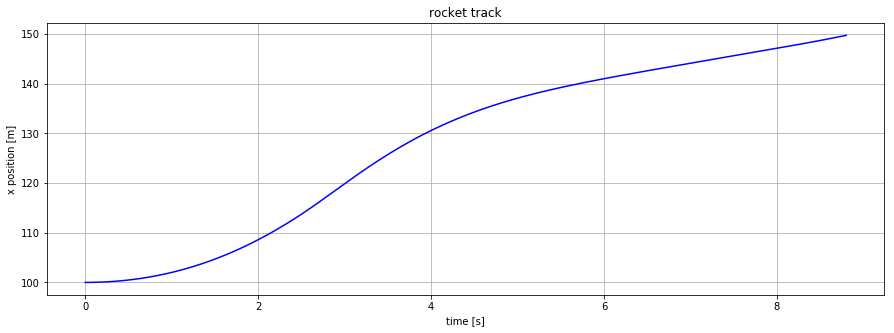

In [24]:
# Student code to plot flight paths 
t=tracks[0][:,0]
x=tracks[0][:,1]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t,x, 'b-')
plt.title('rocket track') 
plt.xlabel('time [s]')
plt.ylabel('x position [m]')
plt.grid()
plt.show()


In [25]:
# Check how many flights succeeded:
print(my_rocket.successful_landing_counter)

39
